# Hotel Booking Demand Analysis
This dataset is aquired from Kaggle and contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

We will perform exploratory data analysis with python to get insight from the data.

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.

# Dataset Link: 
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?sort=votes

# Objective
The objective of this Notebook is to analyze the Demand of Hotel Booking using the given dataset and gather findings that are presentable to the Stakeholders in order to make(suggest) the improvements(data-driven decisions) in their Hotel Management. Technically, Exploratory Data Analysis, commonly called EDA, will be performed in this Notebook using Python Visualization libraries like Matplotlib, Seaborn.

We will try to answer the following Questions How Many Booking Were Cancelled? What is the booking ratio between Resort Hotel and City Hotel? What is the percentage of booking for each year? Which is the busiest month for hotels? From which country most guests come? How Long People Stay in the hotel? Which was the most booked accommodation type (Single, Couple, Family)? After that, we will make the predictive model to make predictions in the future whether the booking will be canceled or not

We will: Perform the Feature Engineering to make new features Perform the Feature Selection to select only relevant features Transform the Data (Categorial to Numerical) Split the data (Train Test Split) Model the data (Fit the Data) And finally, Evaluate our model

# Data Description:
1.hotel (str) - Hotel (H1 = Resort Hotel or H2 = City Hotel) 
2.lead_time (int) - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date 3.arrival_date_year (int) - Year of arrival date
4.arrival_date_month (str) - Month of arrival date
5.arrival_date_week_number (int) - Week number of year for arrival date 
6.arrival_date_day_of_month (int) - Day of arrival date
7.stays_in_weekend_nights (int) - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel 
8.stays_in_week_nights (int) - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel 9.adults (int) - Number of adults 
10.children (float) - Number of children 
11.babies (int) - Number of babies
12.meal (str) - Type of meal booked. Categories are presented in standard hospitality meal packages: (Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half board – breakfast and one other meal - usually dinner, FB = Full board – breakfast, lunch and dinner) 
13.country (str) - Country of origin. Categories are represented in the ISO 3155–3:2013 format 
14.market_segment (str) - Market segment designation (TA = Travel Agents, TO = Tour Operators)
15.distribution_channel (str) - Booking distribution channel (TA = Travel Agents, TO = Tour Operators)
16.is_repeated_guest (int) - Value indicating if the booking name was from a repeated guest (1) or not (0) 
17.previous_cancellations (int) - Number of previous bookings that were cancelled by the customer prior to the current booking
18.previous_bookings_not_canceled (int) - Number of previous bookings not cancelled by the customer prior to the current booking
19.reserved_room_type (str) - Code of room type reserved. Code is presented instead of designation for anonymity reasons 20.assigned_room_type (str) - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonnymity reasons
21.booking_changes (int) - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation 
22.deposit_type (str) - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: (No Deposit = no deposit was made, Non Refund = a deposit was made in the value of the total stay cost, Refundable = a deposit was made with a value under the total cost of stay) 
23.agent (float) - ID of the travel agency that made the booking 
24.company (float) - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons 
25.days_in_waiting_list (int) - Number of days the booking was in the waiting list before it was confirmed to the customer 26.customer_type (str) - Type of booking, assuming one of four categories: (Contract = when the booking has an allotment or other type of contract associated to it, Group = when the booking is associated to a group, Transient = when the booking is not part of a group or contract, and is not associated to other transient booking, Transient-party = when the booking is transient, but is associated to at least other transient booking 
27.adr (float) - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights 
28.required_car_parking_spaces (int) - Number of car parking spaces required by the customer 29.total_of_special_requests (int) - Number of special requests made by the customer (e.g. twin bed or high floor)
30.reservation_status (str) - Reservation last status, assuming one of three categories: (Canceled = booking was canceled by the customer, Check-Out = customer has checked in but already departed, No-Show = customer did not check-in and did inform the hotel of the reason why) 
31.reservation_status_date (str) - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Necessary library

In [1]:
## Importing required libraries

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# Reading the Hotel Dataset

In [2]:
# To dispaly all the columns
pd.set_option('display.max_columns', None)

# reading csv file to pandas dataframe(df)

df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Showing the number of rows & columns in the dataset using shape

In [3]:
df.shape

(119390, 32)

There were around 1.2 lakh data points with 32 features

# Checking the data type of each column by using dtypes
1
df.dtypes

In [4]:
df.describe(include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,10/21/2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


statistical summary of all the columns

# Check the informations about the dataset using info() function

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

gives the data type of each columns

In [6]:
## missing values detection

df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Company column has 94 % and agent has 13 % missing values, its better to drop it rather than treating them

In [7]:
df = df.drop(['agent','company'],axis=1)

In [8]:
## Missing value treatment

df['country'].fillna('None', inplace=True)

df['children'].fillna(0, inplace=True)


In [9]:
df.isnull().sum()/len(df)*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

There were no missing values now

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### Exploring unique values, value Counts

In [11]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

there is a 37 % of cancellation across over all bookings

In [12]:
44224/len(df)

0.37041628277075134

In [13]:
df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Data is belong to 2015, 2016 and 2017, in 2016 number of bookings were more compare to other two years

In [14]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

Shows the unique values in each column

# Showing all the column names

### Visualization

In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# DATA CLEANING

In [16]:
df.duplicated().value_counts()

False    87370
True     32020
dtype: int64

# Checking is their any null value present in our Dataset Column wise in % form

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Percentage of missing values

In [18]:
df.isnull().sum()*100/df.shape[0]

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [19]:
company_name= df.isnull().sum().rename('num_of_missing').reset_index()
company_name.columns = ['feature', 'num_of_missing']
company_name['percentage_of_missings'] = company_name['num_of_missing'].apply(lambda x:x/len(df))
company_name.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
0,hotel,0,0.0
1,is_canceled,0,0.0
28,reservation_status,0,0.0
27,total_of_special_requests,0,0.0
26,required_car_parking_spaces,0,0.0
25,adr,0,0.0
24,customer_type,0,0.0
23,days_in_waiting_list,0,0.0
22,deposit_type,0,0.0
21,booking_changes,0,0.0


<AxesSubplot:xlabel='feature', ylabel='percentage_of_missings'>

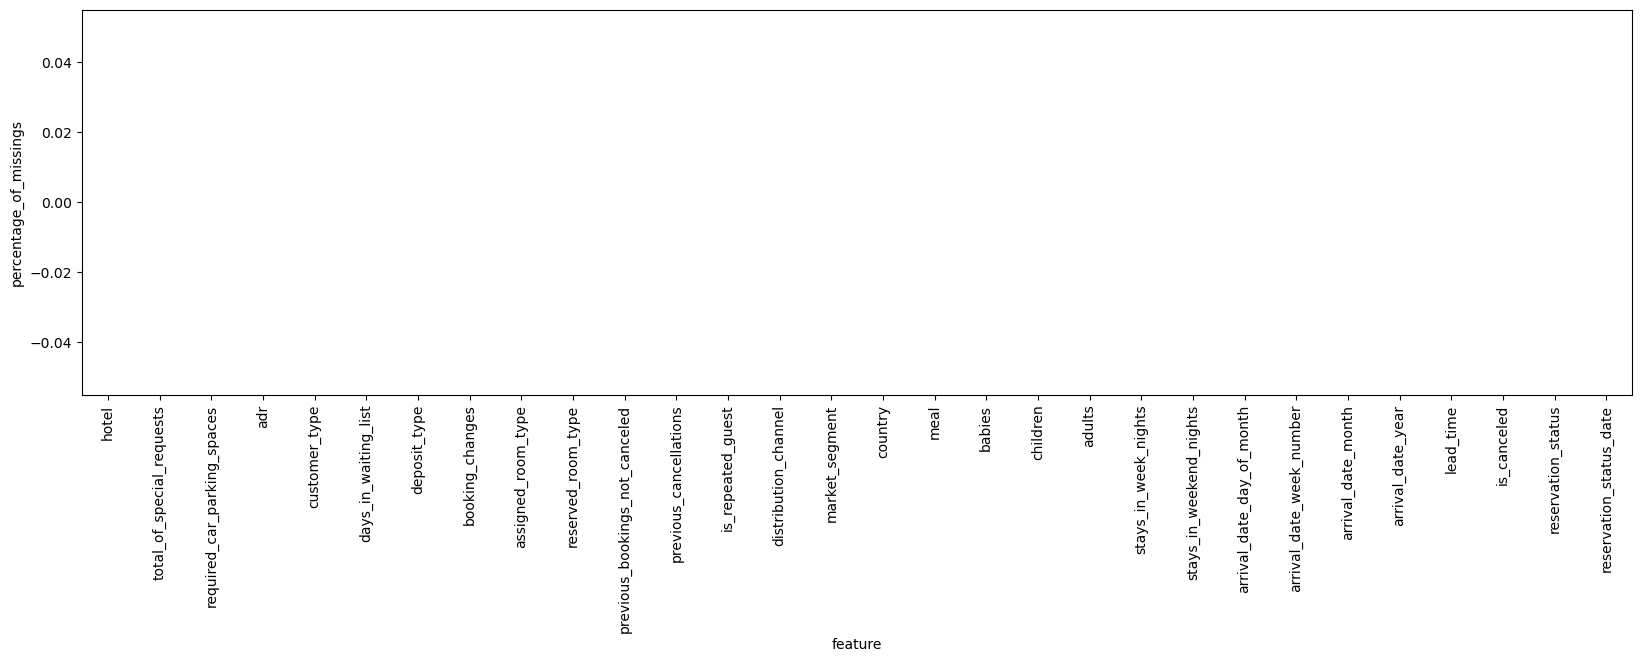

In [20]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='feature',y='percentage_of_missings',data=company_name.sort_values(by='percentage_of_missings'))

# Modelling

Will check the correlation between the variables with the help of heatmaps and drop the highly correlated variables

<AxesSubplot:>

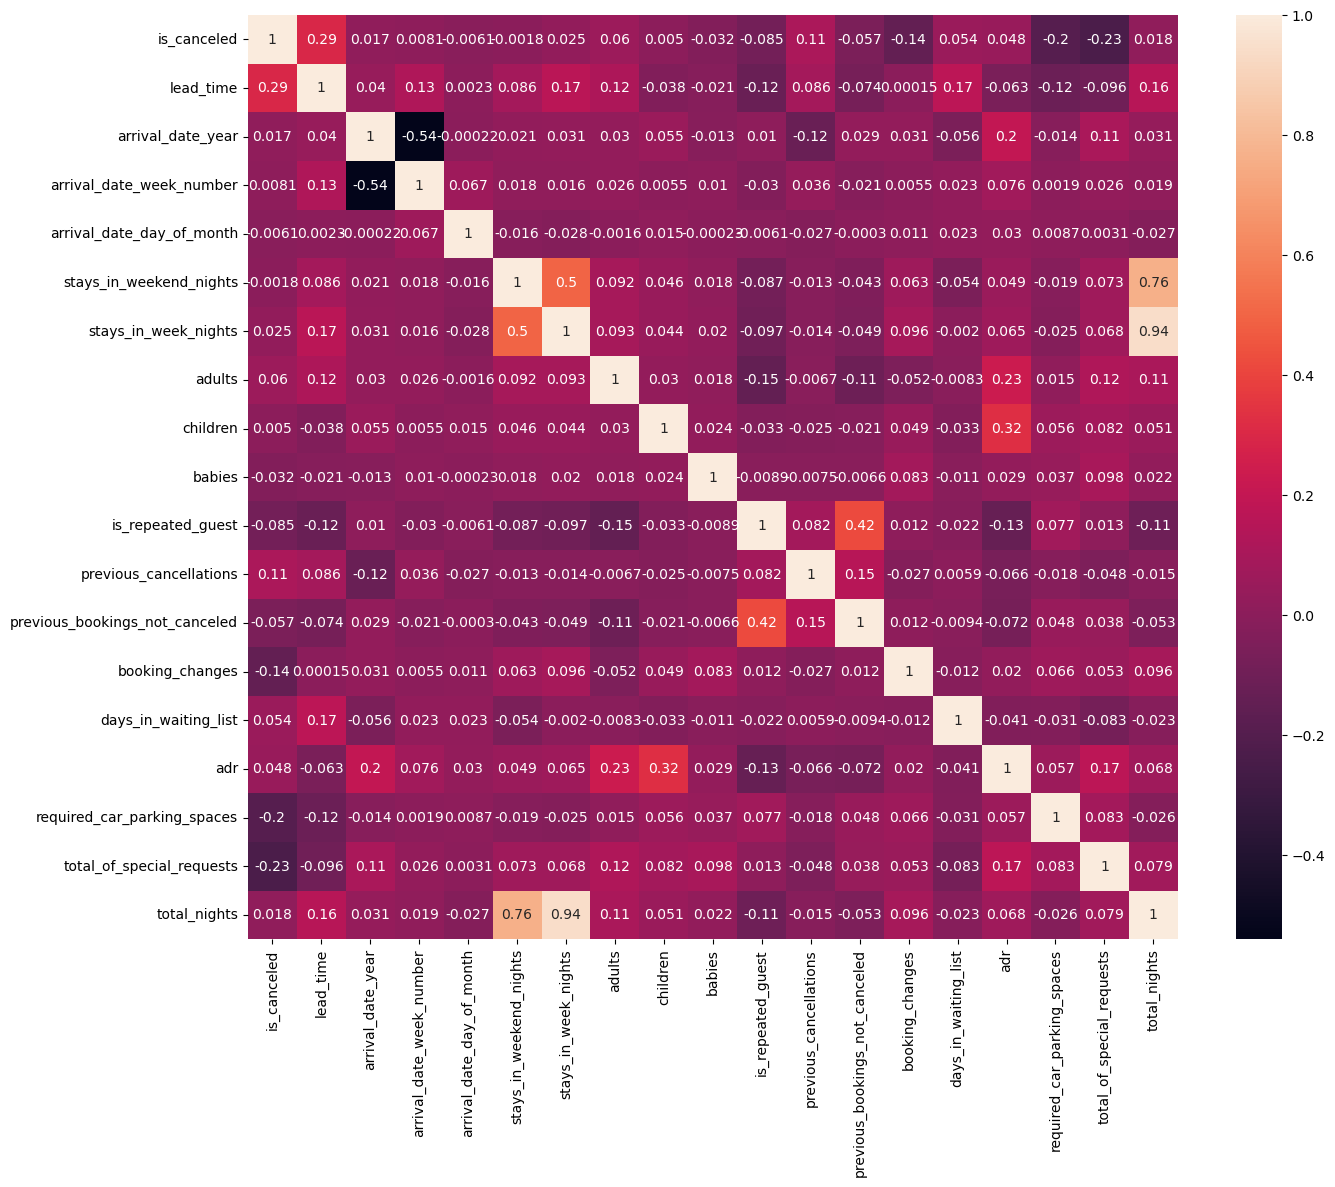

In [81]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot = True)

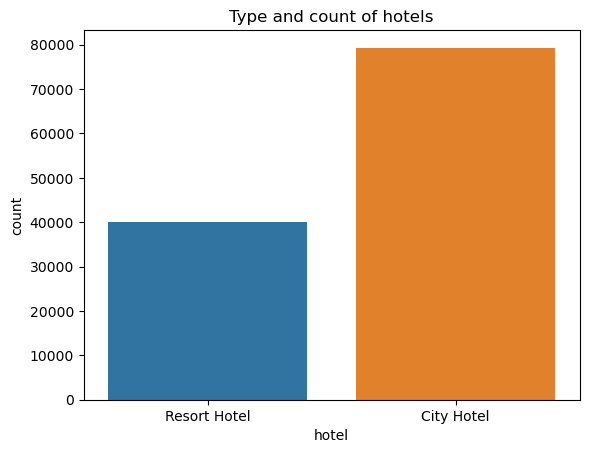

In [21]:
sns.countplot(x = 'hotel', data = df)
plt.title("Type and count of hotels")
plt.show()

City hotel has more bookings compare to resort hotel

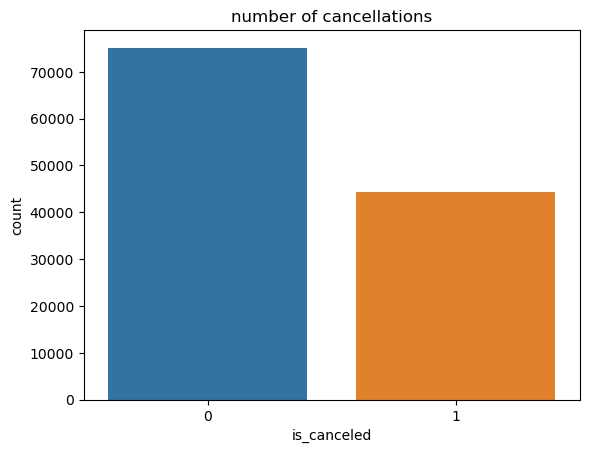

In [22]:
sns.countplot(x = 'is_canceled', data = df)
plt.title("number of cancellations")

plt.show()

most of the bookigs were not cancelled, around 40000 bookings were cancelled which is around 37 % of the total bookings

In [23]:
len(df[df.is_canceled == 1])/len(df)

0.37041628277075134

# Lets see cancellation split between type of hotels

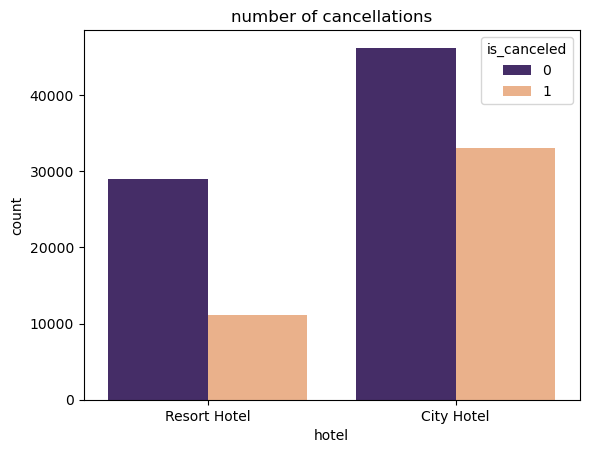

In [24]:
sns.countplot(x = 'hotel',hue = 'is_canceled', data = df, palette=['#432371',"#FAAE7B"])
plt.title("number of cancellations")

plt.show()

most of the bookings happening in city hotel and cancellation is also high

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

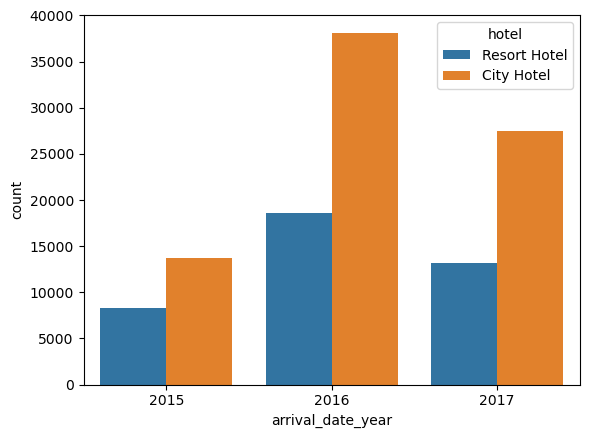

In [25]:
sns.countplot(x = 'arrival_date_year', data = df, hue = 'hotel')

across the years trend remain same - city hotel has the major share holder in bookings, but in 2017 bookings has dropped in both the hotel types

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

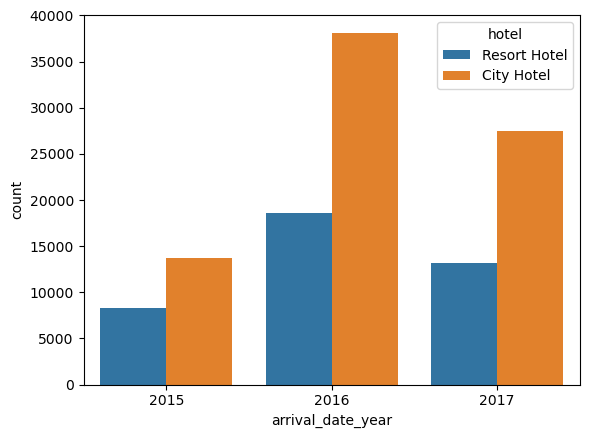

In [26]:
sns.countplot(x = 'arrival_date_year', data = df, hue = 'hotel')

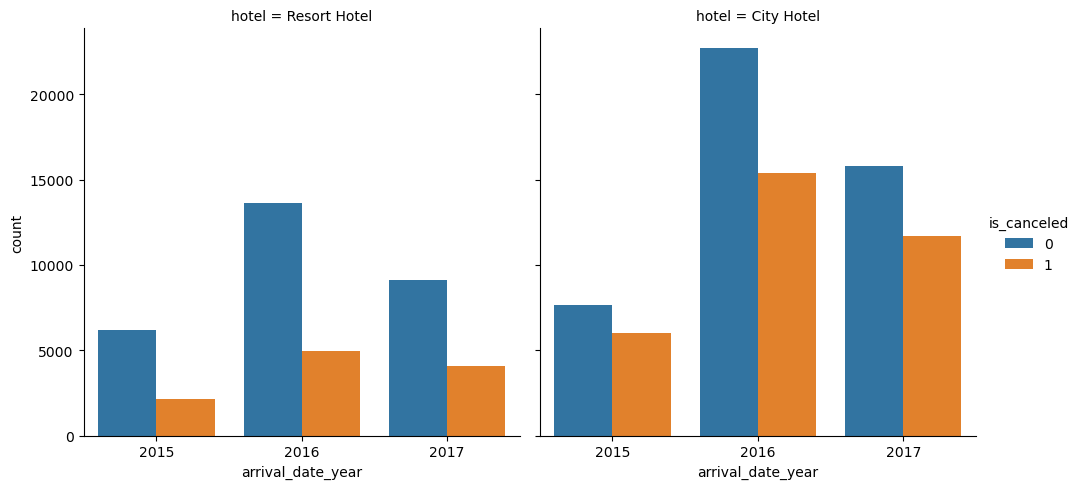

In [27]:
sns.catplot(x ="arrival_date_year", hue="is_canceled", col="hotel", data = df, kind="count")
plt.show()

this gives comparative view of type of hotel booked over the years and cancellation status

<function matplotlib.pyplot.show(close=None, block=None)>

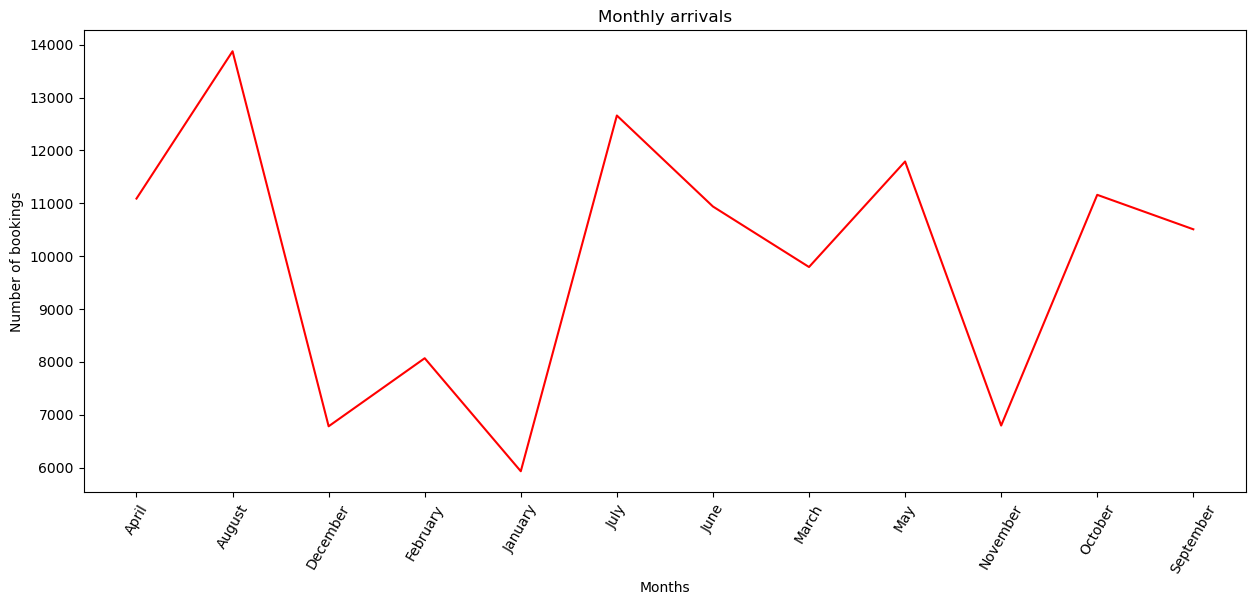

In [28]:
df_year = df.groupby(['arrival_date_month']).agg({'hotel':'count'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "arrival_date_month",y = 'hotel',data = df_year, color = 'red' )
plt.xticks(rotation = 60)
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.show

across the years, July and August are the months with high number of bookings

In [29]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


Text(0.5, 1.0, 'monthly arrivals actross the months and hotel type ')

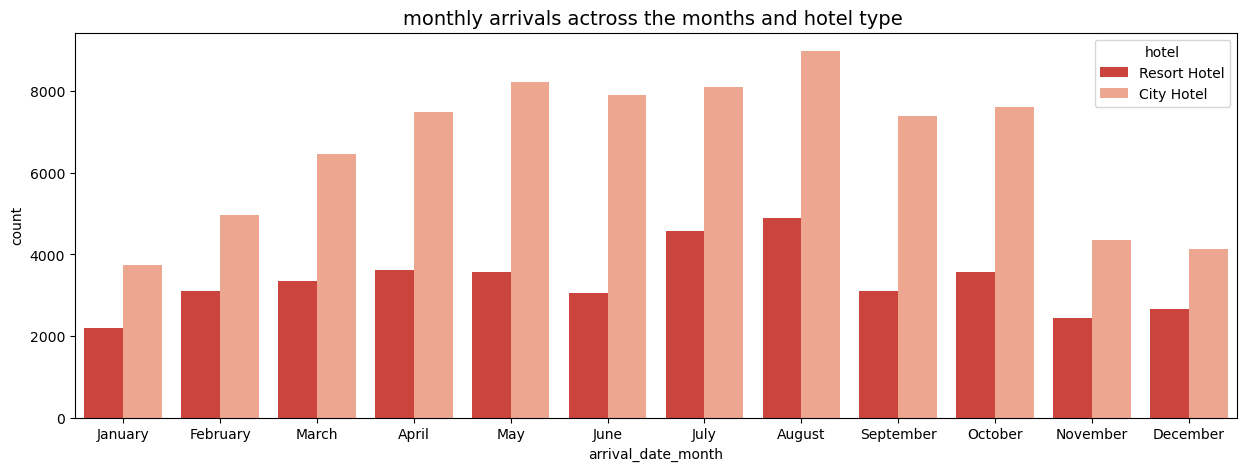

In [30]:
fig = plt.figure(figsize = (15,5))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.countplot(data = df,x = 'arrival_date_month',hue = 'hotel',palette ="Reds_r",order=months)
plt.title('monthly arrivals actross the months and hotel type ', fontsize=14)

In [31]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [32]:
bookings_confirmed = df[df['is_canceled'] == 0]

Text(0, 0.5, 'No. of bookings')

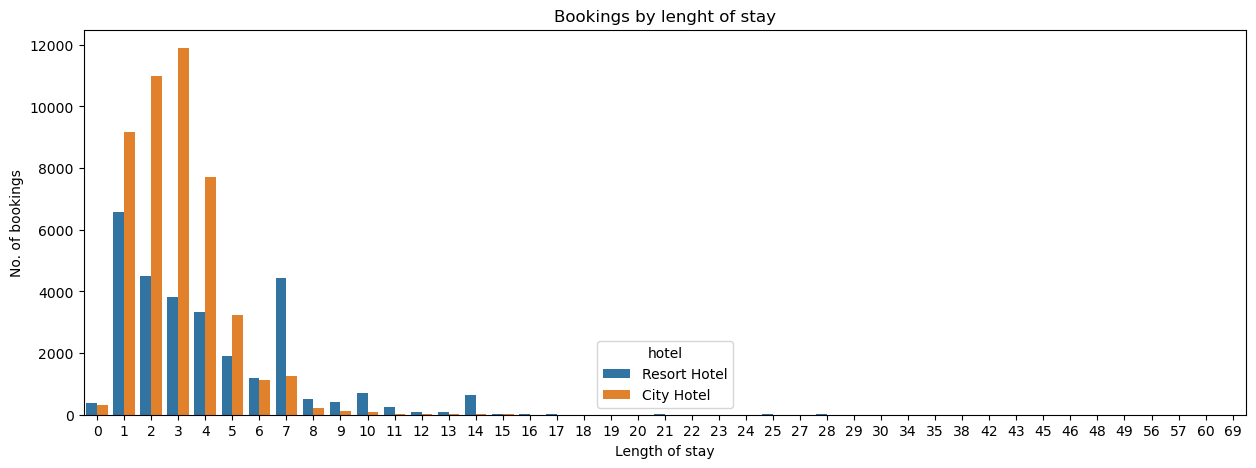

In [33]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x = 'total_nights', data = bookings_confirmed, hue = 'hotel')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('No. of bookings')


Most of the bookings are for 1 to 4 days for the city hotel and  1 and 7 days for resort hotel

In [34]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

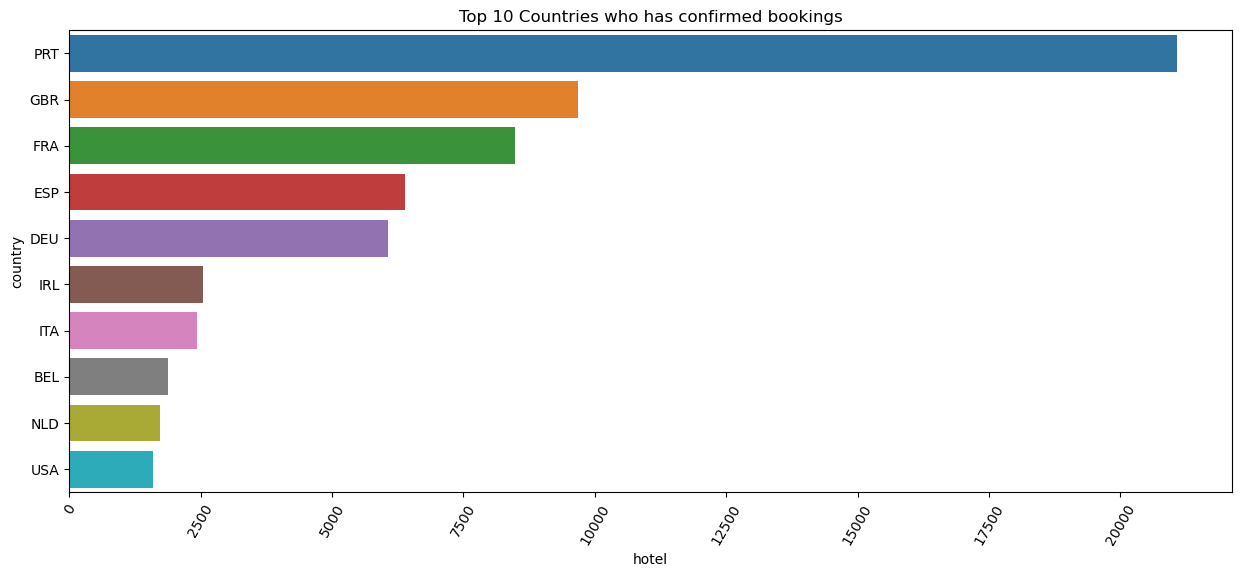

In [35]:
df_country = bookings_confirmed.groupby(['country']).agg({'hotel':'count'}).reset_index().sort_values(by=['hotel'],ascending=False)[:10]
plt.figure(figsize=(15,6))
sns.barplot(y = "country",x = 'hotel', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries who has confirmed bookings')
plt.show()

Portugal (PRT) is at the top rank of the visiting country. The top guests are mainly from around the Europe.

In [36]:
df_pie = bookings_confirmed.groupby(['is_repeated_guest']).agg({'hotel':'count'}).reset_index()


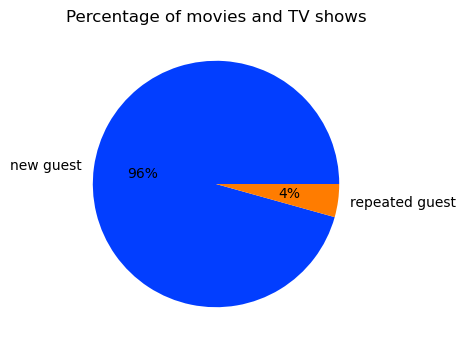

In [37]:
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(10,4))
labels = ['new guest', 'repeated guest']

plt.pie(df_pie['hotel'], labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of movies and TV shows')
plt.show()

there is very less repeated customer, most of them are new customer

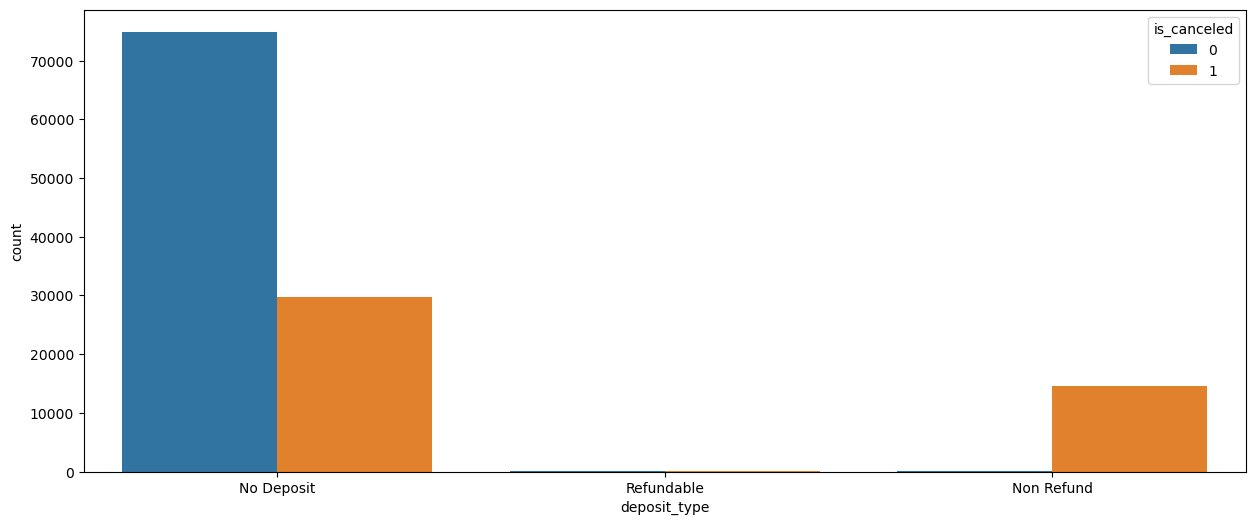

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled')
plt.show()

# Favourites meal of guests

In [39]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [40]:
k=df.iloc[np.where(df["adults"])]["meal"].value_counts()
k2=df.iloc[np.where(df["children"])]["meal"].value_counts()
k3=df.iloc[np.where(df["babies"])]["meal"].value_counts()

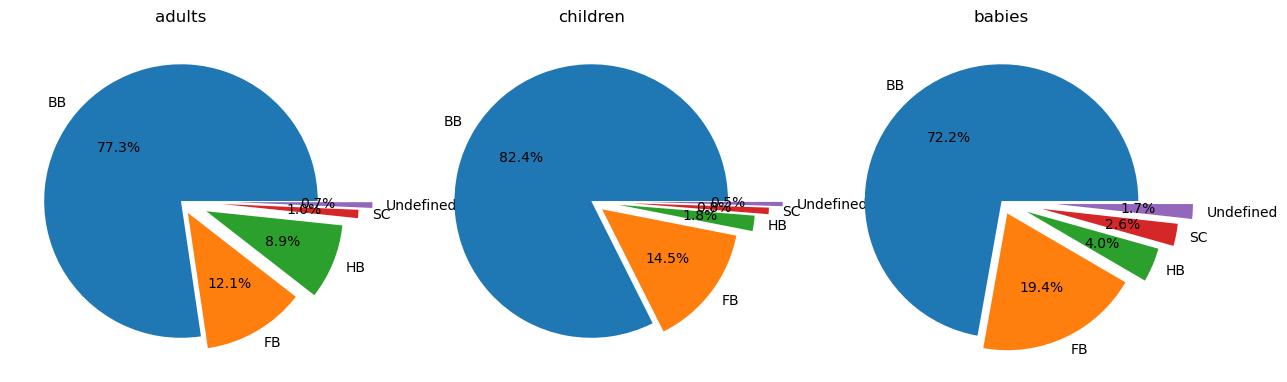

In [41]:
meal=['BB', 'FB', 'HB', 'SC', 'Undefined']
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(x=k, data=df, labels=meal,explode=(0,0.1,0.2,0.3,0.4),autopct='%.1f%%');
plt.title('adults');

plt.subplot(1,3,2)
plt.pie(x=k2,data=df, labels=meal,explode=(0,0.1,0.2,0.3,0.4),autopct='%.1f%%');
plt.title('children');

 
plt.subplot(1,3,3)
plt.pie(x=k3,data=df,labels=meal,explode=(0,0.1,0.2,0.3,0.4),autopct='%.1f%%');
plt.title('babies');

<Figure size 1500x600 with 0 Axes>

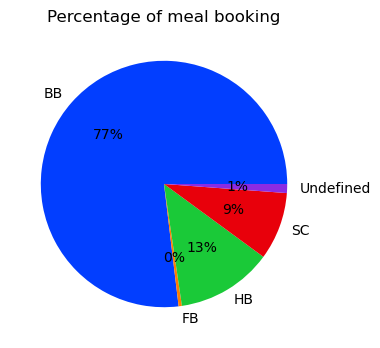

In [42]:
plt.figure(figsize=(15,6))
df_pie = bookings_confirmed.groupby(['meal']).agg({'hotel':'count'}).reset_index()
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(10,4))

plt.pie(df_pie['hotel'], labels = df_pie.meal , colors = colors, autopct='%.0f%%')
plt.title('Percentage of meal booking')
plt.show()

most of the visitors prefer bed & breakfast (BB) followed by full board (FB), half board (HB) and  self cater (SC)

In [43]:
df[df['market_segment']=='Online TA'] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,5/6/2015,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,6/23/2015,4
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,7/5/2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,209.00,0,0,Check-Out,9/5/2017,6
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017,7


# Maximum no of previous bookings not canceled according to the hotel

In [44]:
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [45]:
previous_cancellations1=df.iloc[np.where((df['hotel']=='City Hotel') & df['previous_cancellations'])]['arrival_date_year'].value_counts()
previous_cancellations2=df.iloc[np.where((df['hotel']=='Resort Hotel') & df['previous_cancellations'])]['arrival_date_year'].value_counts()

Text(0.5, 1.0, 'resort_hotel')

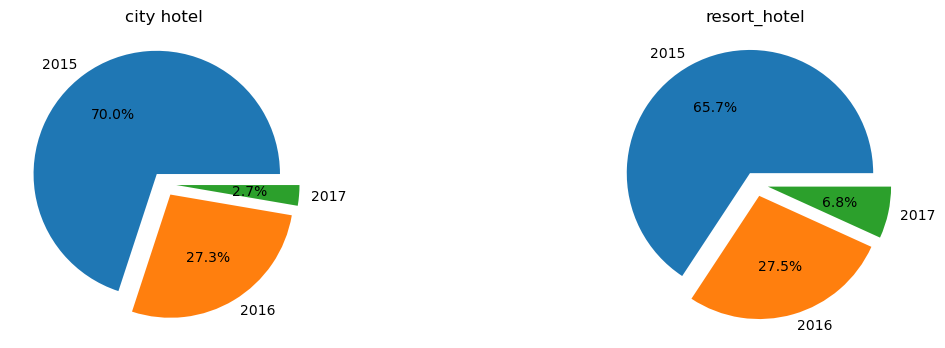

In [46]:
plt.figure(figsize=(14,4))
label=[2015,2016,2017]

plt.subplot(1,2,1)
plt.pie(x=previous_cancellations1,labels=label,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('city hotel')

plt.subplot(1,2,2)
plt.pie(x=previous_cancellations2,labels=label,explode=(0.1,0.1,0.1),data=df,autopct='%.1f%%');
plt.title('resort_hotel')

In [47]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

In [48]:
x1=df.groupby('hotel')['previous_bookings_not_canceled'].max()

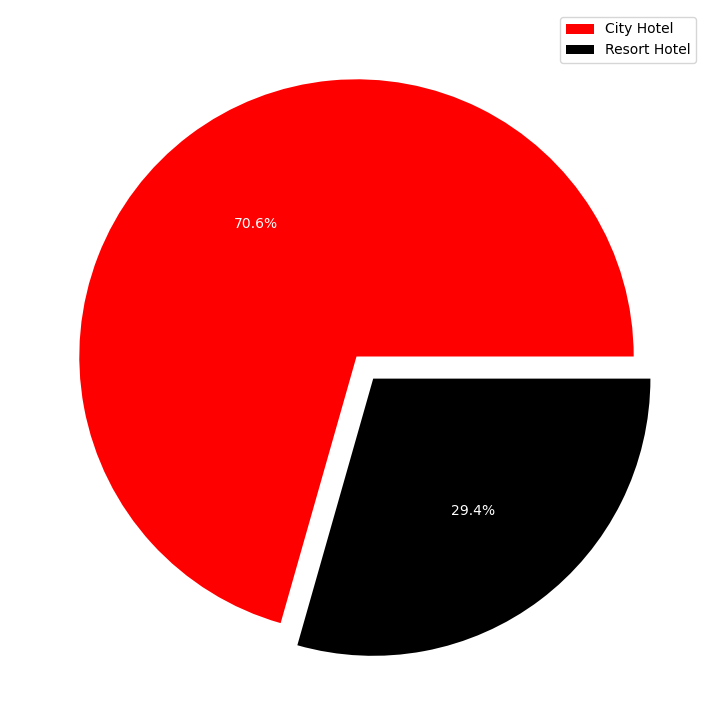

In [49]:
plt.figure(figsize=(14,9))
labels = ["City Hotel","Resort Hotel"]
plt.pie(x=x1,data=df,colors=['red','Black'],labels=labels,explode=(0,0.1),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");

In [50]:
x2=df.groupby('arrival_date_year')['previous_bookings_not_canceled'].max()

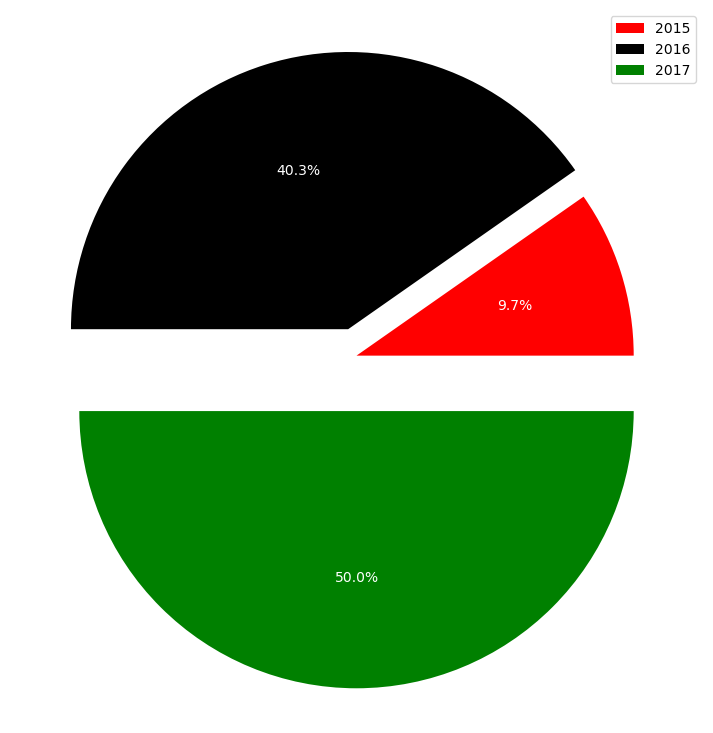

In [51]:
plt.figure(figsize=(14,9))
labels = [2015,2016,2017]
plt.pie(x=x2,data=df,colors=['red','black','green'],labels=labels,explode=(0,0.1,0.2),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");


# Maximum no cancellation according to the market segement

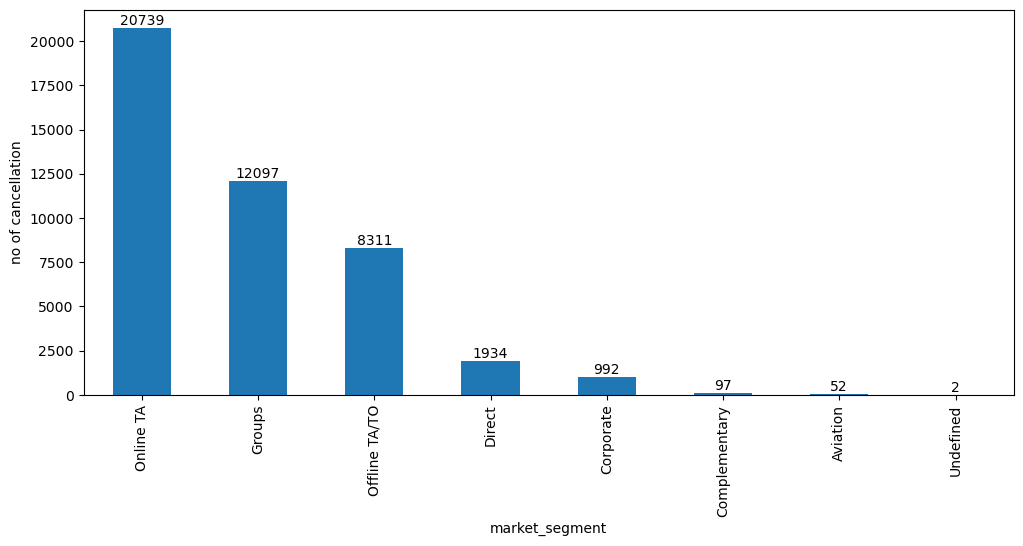

In [52]:
plt.figure(figsize=(12,5))
az=df[df["is_canceled"]==1]['market_segment'].value_counts().plot(kind='bar')
az.bar_label(az.containers[0]);
plt.xlabel('market_segment')
plt.ylabel('no of cancellation');

# Maximum cancellation in which month?

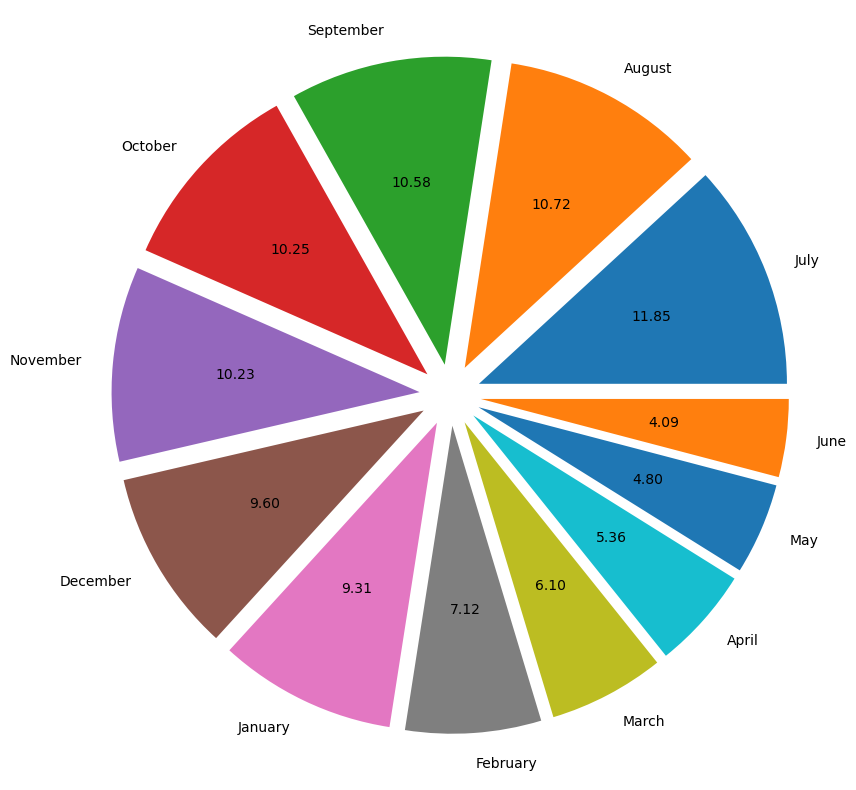

In [53]:
data = df[df['is_canceled']==1]['arrival_date_month'].value_counts()
plt.figure(figsize =(12, 10))
plt.pie(data,labels=df['arrival_date_month'].unique(), explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.2f');

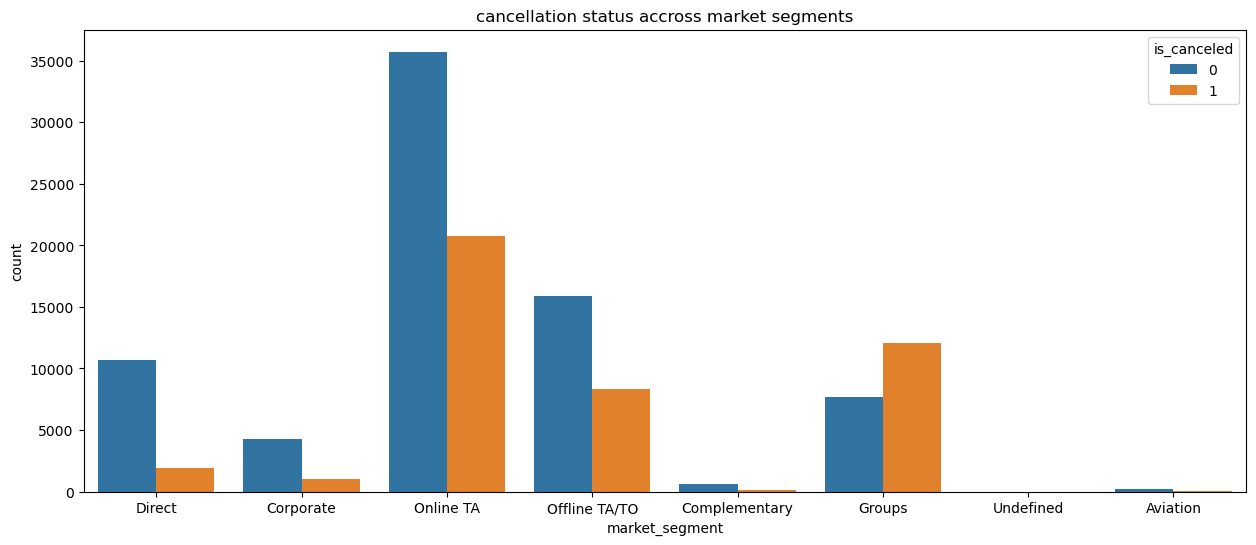

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'market_segment',data = df, hue='is_canceled')
plt.title('cancellation status accross market segments')
plt.show()

most of the cancellations accounting to online TA and Groups

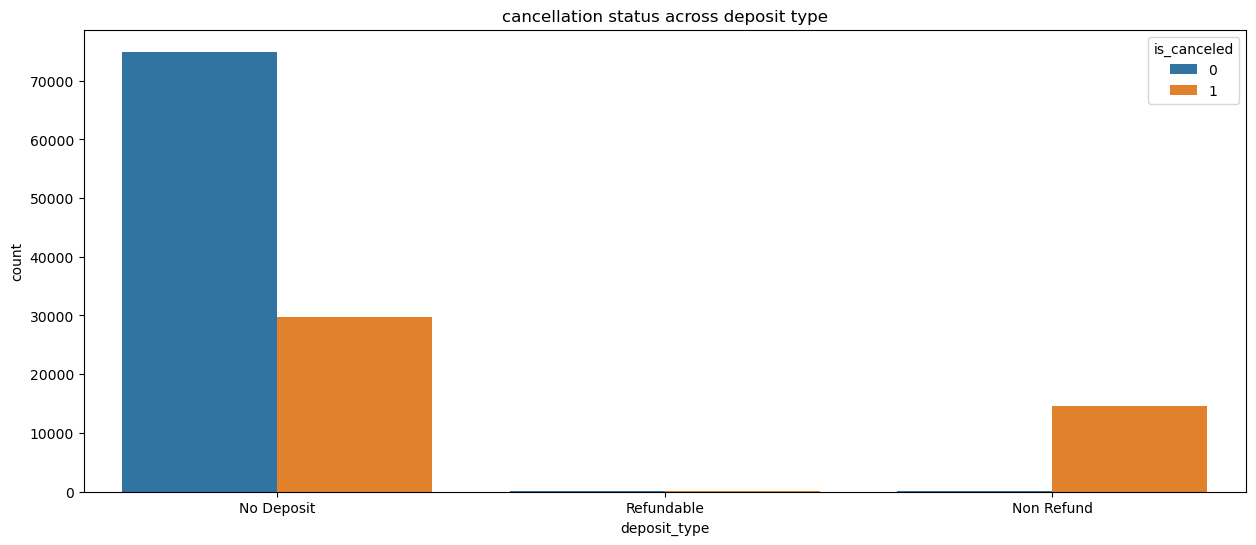

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'deposit_type',data = df, hue='is_canceled')
plt.title('cancellation status across deposit type')
plt.show()

most of the bookings dont have mandaotory deposit, cancellations were also high here

Text(0.5, 1.0, 'total nights across months')

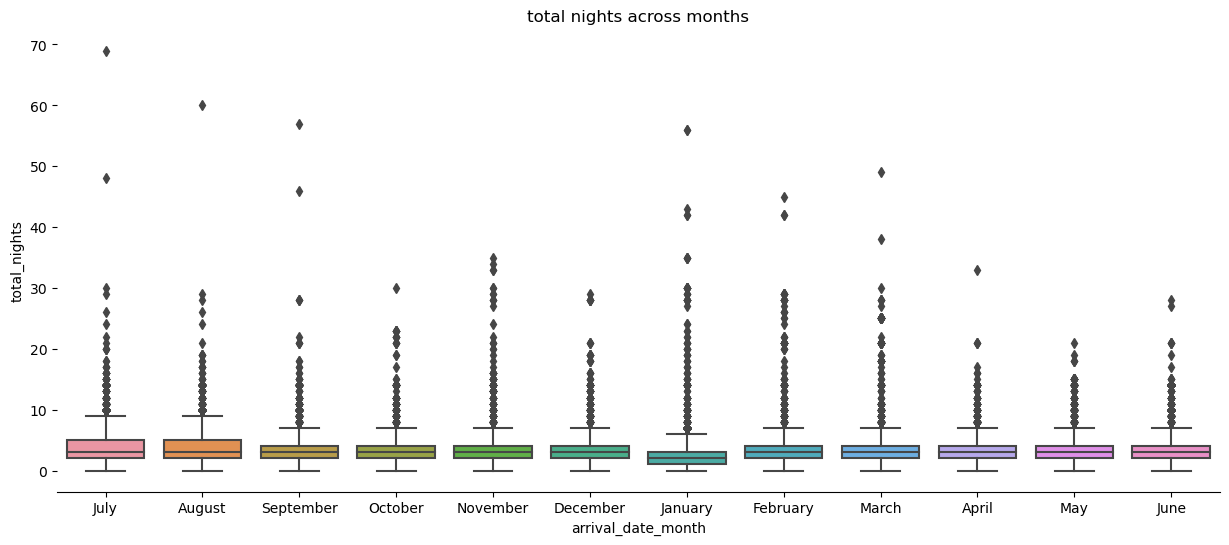

In [56]:

plt.figure(figsize=(15,6))
sns.boxplot(x='arrival_date_month', y='total_nights', data=df, )
sns.despine(left=True)
plt.title('total nights across months')


# How many special requests of both hotels?

In [57]:
df.groupby('hotel')['total_of_special_requests'].value_counts()

hotel         total_of_special_requests
City Hotel    0                            47957
              1                            21420
              2                             8142
              3                             1587
              4                              198
              5                               26
Resort Hotel  0                            22361
              1                            11806
              2                             4827
              3                              910
              4                              142
              5                               14
Name: total_of_special_requests, dtype: int64

# Maximum cancellation of total of special requests?

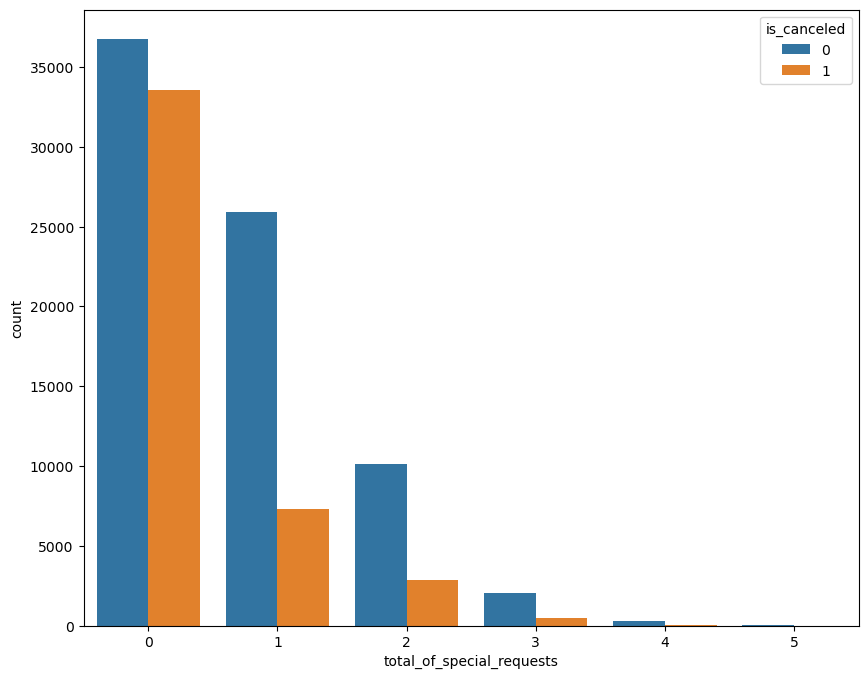

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled');

across all the months total nights Distribution has more or less same, but there were lot of outliers across the months

# How many guest arrived in each hotel month per year in each hotel?

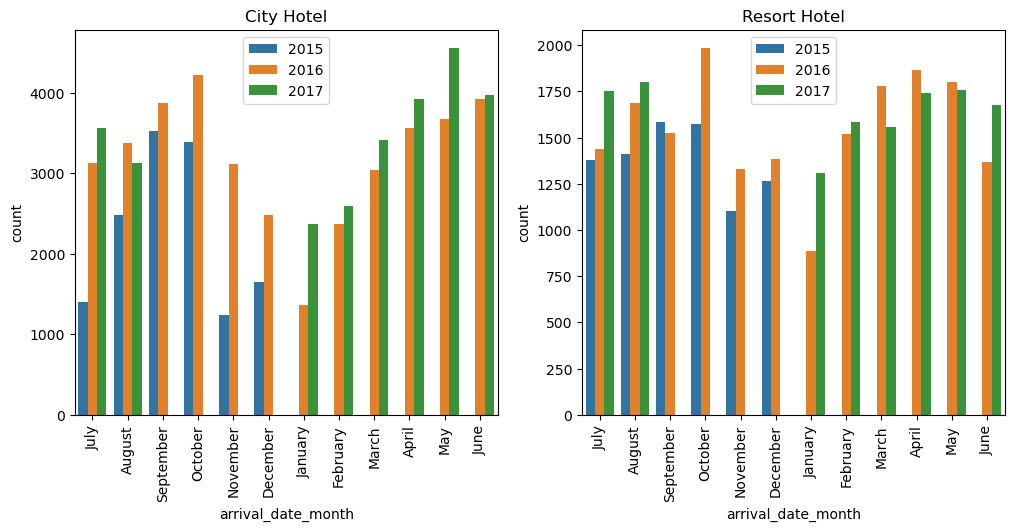

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=df[df["hotel"]=="City Hotel"]["arrival_date_month"], data=df, hue="arrival_date_year")
plt.title('City Hotel')
plt.legend(loc='upper center')
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sns.countplot(x=df[df["hotel"]=="Resort Hotel"]["arrival_date_month"], data=df, hue="arrival_date_year")
plt.title('Resort Hotel')
plt.legend(loc='upper center')
plt.xticks(rotation=90);

Peak month in City Hotel : 2015/September, 2016/October and 2017/May Peak month in Resort Hotel : 2015/September, 2016/October and 2017/August

# Maximum people arrived date in the month

<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='count'>

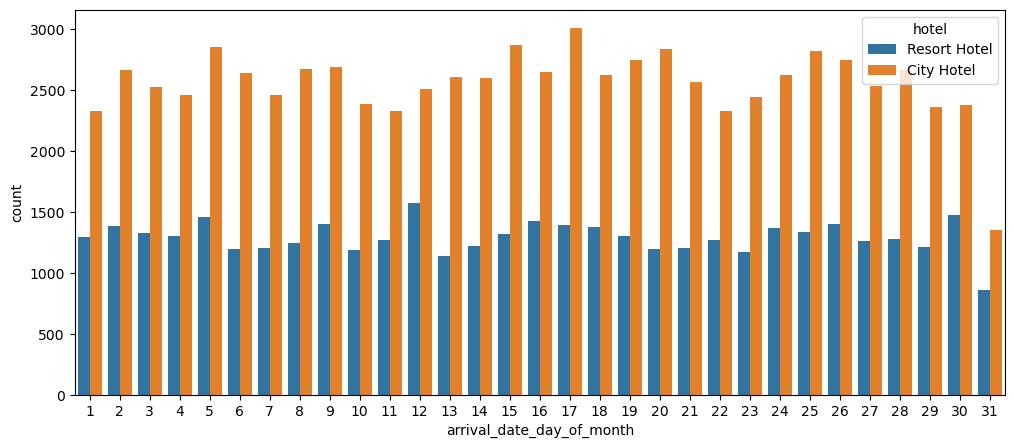

In [60]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_day_of_month',hue='hotel',data=df)

Maximum no of people was arrived on date 17 date of City Hotel Maximum no of people was arraived on date 12 date of Resort Hotel

You can see that BB meal is most prefered by guests.

# Maximum no guests coming from which country?

In [61]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'None', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA',

<AxesSubplot:>

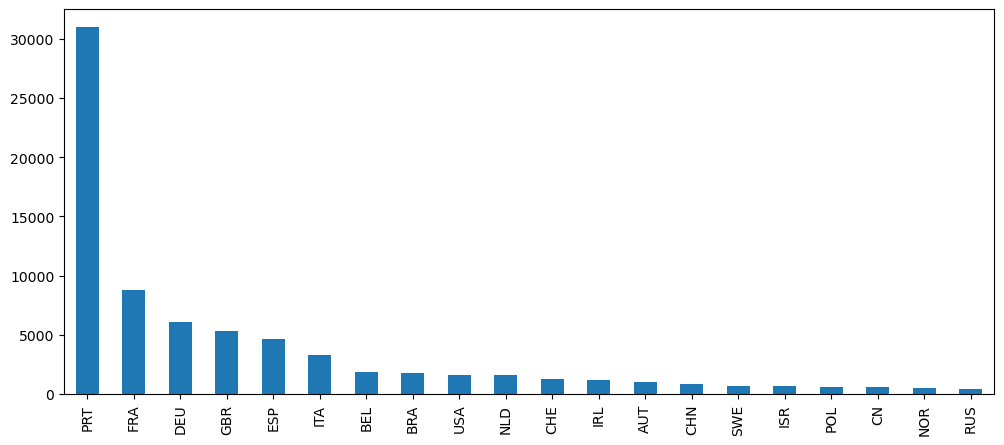

In [62]:
plt.figure(figsize=(12,5))
df[df['hotel']=='City Hotel']['country'].value_counts()[0:20].plot(kind='bar')

# Maximum cancellation in which month?

In [63]:
x1=df[df['is_canceled']==1]

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

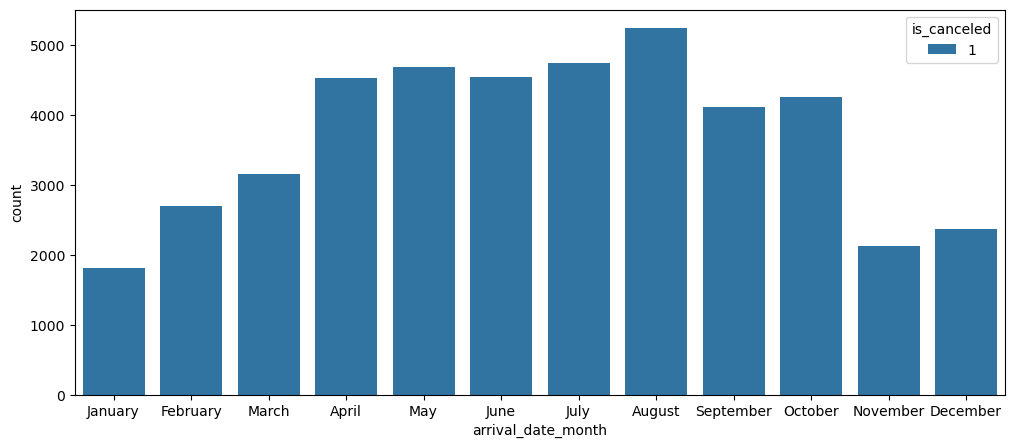

In [64]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month',hue='is_canceled',order=["January","February","March","April","May","June","July","August","September","October","November","December"],data=x1)

# Maximum cancellation in which year?

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

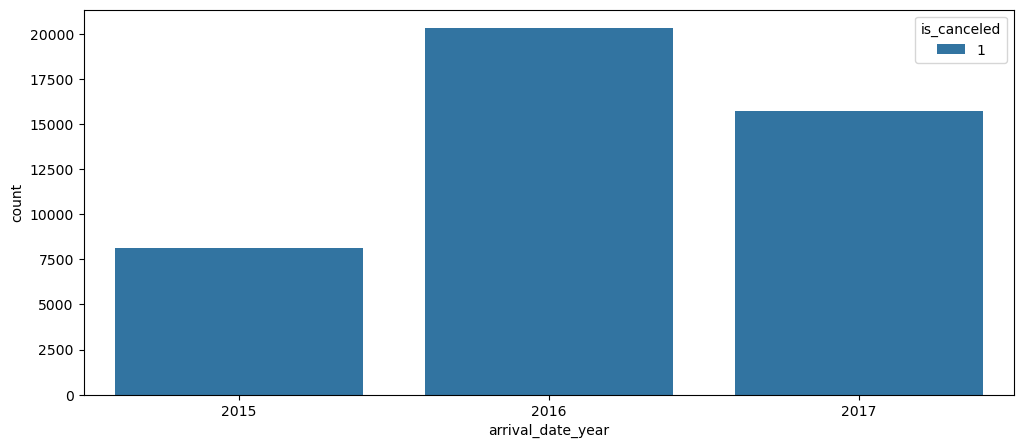

In [65]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year',hue='is_canceled',data=x1)

Last three year of booking maxmimum no of booking is by online Travel agent. Total 56477 guests use online booking half of the book are from online TA.

# Market segment by country

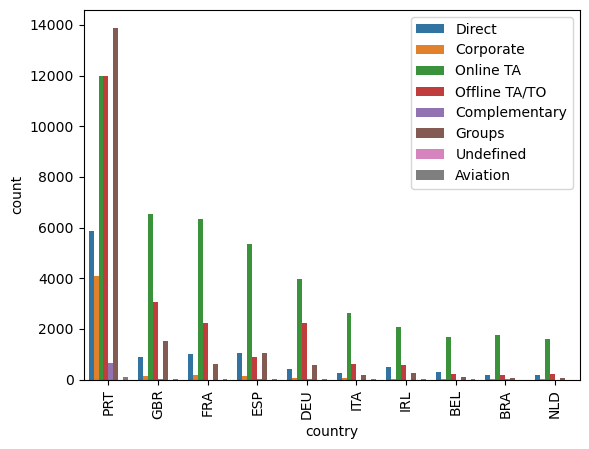

In [66]:
sns.countplot("country", data=df, hue="market_segment", order=df["country"].value_counts()[:10].index)
plt.legend(loc="upper right")
plt.xticks(rotation=90);

### Insights from EDA


- City hotel has more bookings compare to resort hotel
- Most of the bookings were not cancelled, around 40000 bookings were cancelled which is around 37 % of the total bookings
- Most of the bookings happening in city hotel and cancellation is also high
- Across the years trend remain same - city hotel has the major share holder in bookings, but in 2017 bookings has dropped in both the hotel types
- Across the years, July and August are the months with high number of bookings
- Most of the bookings are for 1 to 4 days for the city hotel and  1 and 7 days for resort hotel
- Portugal (PRT) is at the top rank of the visiting country. The top guests are mainly from around the Europe.
- There is very less repeated customer, most of them are new customer
- Most of the visitors prefer bed & breakfast (BB) followed by full board (FB), half board (HB) and  self cater (SC)
- Most of the cancellations accounting to online TA and Groups


there is a high correlation between 3 columns week nights, weekend nights and total nights, will drop first two columns

In [68]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

In [69]:
## dropping unwanted columns and creating dummy variables for categorical variables

df_ = df.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','stays_in_weekend_nights',
       'stays_in_week_nights','reservation_status','reservation_status_date'], axis=1)

df_ = pd.concat([df_, 
                 pd.get_dummies(df_['hotel'], drop_first=True), 
                 pd.get_dummies(df_['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(df_['market_segment'], drop_first=True),
                 pd.get_dummies(df_['distribution_channel'], drop_first=True),
                 pd.get_dummies(df_['customer_type'], drop_first=True)
                 ], axis=1)

df_ = df_.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

# Transform Skewed Features

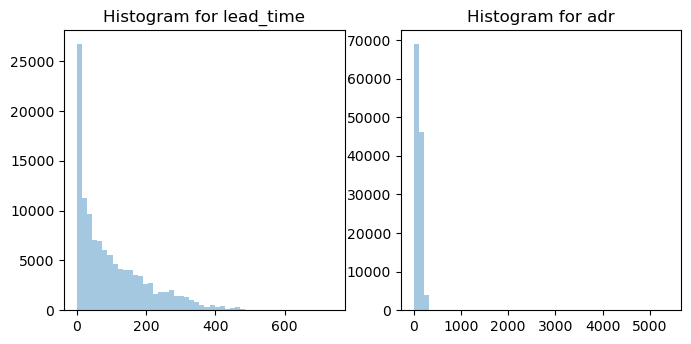

In [70]:
# Plot histogram for each continuous feature to see if a transformation is necessary
plt.figure(figsize=(21,8))
col = 1

for feature in ["lead_time","adr"]:
    if col<11:
        plt.subplot(2,5,col)
        sns.distplot(df[feature], kde=False).set(xlabel=None)
        plt.title("Histogram for %s" % (feature))
    col += 1

# splitting the data into train and test


In [71]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

y = df_['is_canceled']
X = df_.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1000 ,test_size=0.3)

# Scaling

In [72]:
## Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fitting random forest classifier

In [73]:
## fitting random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score

classifier = RandomForestClassifier(n_estimators = 8, criterion='entropy', random_state=20)
classifier.fit(X_train,y_train)

# Predict

y_pred = classifier.predict(X_test)


# Computing accuracy

print("Accuracy :", accuracy_score(y_test, y_pred))
print ("roc_auc_score :", roc_auc_score(y_test,y_pred))

Accuracy : 0.8532540413769998
roc_auc_score : 0.8270534046037691


Model is performing pretty well with accuracy score of 85%

In [74]:
dep=['target']
col_num=['lead_time','adr','stays_in_weekend_nights']

col_char=['total_of_special_requests','customer_type','reserved_room_type','distribution_channel',
          'market_segment']

In [75]:
X_char_dum = pd.get_dummies(df[col_char],drop_first=True)

In [76]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1,join='inner')

In [77]:
X_var=X_all
Y_var=df['is_canceled']

# RandomForestClassifier

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, Y_train, y_test = train_test_split(X_var,Y_var,test_size=0.3,random_state=0)

logreg =LogisticRegression()
logreg.fit(X_train,y_train)

dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7,min_samples_leaf=5)
dtree.fit(X_train,y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000,
                                random_state=2,
                                 criterion = 'gini',
                                max_features='auto',max_depth=7)
rf_1000.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=2)

# LogisticRegression

In [79]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set:0.62


Model is performing pretty well with logistic regression score of 62%

# DecisionTreeClassifier

In [80]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of Decision tree classifier on test set:{:.2f}'.format(dtree.score(X_test,y_test)))

Accuracy of Decision tree classifier on test set:0.62


Model is performing pretty well with DecisionTreeClassifier score of 62%

# Observations:

I wanted to show in a plot the peak seasons of bookings with children compared to bookings without children, why?. The same reason i use the pieplots showing percentage of adults, children and babies,the food in any hotel is actually some of the most important aspects to take in consideration when you are looking where to stay on vacation, and in the other hand it also represent a big expense for the hotel, so mi idea was using this charts and plots to create an strategie with the Menu in each hotel, depending the time of the year and the type of hotel considering percentage of customer type, would also be a great idea to register in a dataset the wasted of food that the hotel has each day and also the type off food (if is mostly for kids or for adults) and then use this information to make a menu that adpat perfectly to each season and type of guest and reduce the waste in the food, wich will automatically reduce expenses to the hotel.

The percentage of cancellations per month is actually very high, being around 40% for the City hotel and around 30% for the Resort hotel. that is almost half of the bookings being cancelled, should recomend to go deep into this scenario, a great tool would be a survey that you need to fill in order to make a cancelation where the guest explain what is the reason of the cancelation, then create a dataset with all the common reasons, and data of the guests for 2 things : 1st to take actions and improve in each area that is making the guests cancel the bookings and 2nd to make a Machine Learning model so we can predict the risk of cancelation of each booking.

# Conclusion
In this post, We examined our dataset using exploratory data analysis and try to understand each variable as well as their relationship with each other. The main purpose of EDA is to help understand data before making any assumptions. EDA helps us to see distribution, summary statistics, relationships between variables and outliers. Most of the times the main purposes of this analysis is to have information that can be useful to make improvements in the company, maximamize profits, reduce expenses, improve customer service, etc in this case the companies are the hotel and we can very valious information than we can use in our advantage to improve in every aspect of the business.